In [31]:
import tensorflow as tf
import os

In [32]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [33]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [34]:
img = cv2.imread(os.path.join('dataset', 'FAKE', '0EAwg7WIIMhgnSfLf.png'))

In [35]:
img.shape

(933, 1400, 3)

### Loading the data

In [36]:
data = tf.keras.utils.image_dataset_from_directory('dataset', image_size=(32, 32),shuffle=True)


Found 969 files belonging to 2 classes.


In [37]:
data_it = data.as_numpy_iterator()

In [38]:
batch = data_it.next()

In [39]:
type(batch)

tuple

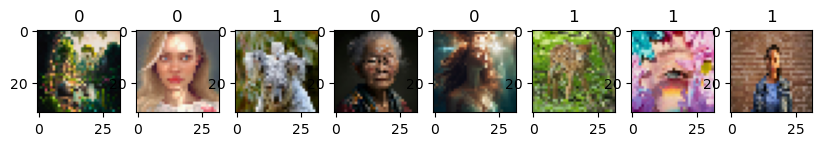

In [40]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [41]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


Scaling the data between 0 and 1

In [42]:
data = data.map(lambda x, y : (x/255, y))

In [43]:
scaled_it = data.as_numpy_iterator()

In [44]:
batch = scaled_it.next()
type(batch)

tuple

In [45]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


Splitting the data into training, cross-validation and testing sets

In [46]:
train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [47]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [48]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Building the DL Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



c:\Users\Aryan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [52]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
logdir = 'logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=20, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/20


21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 680ms/step - accuracy: 0.5333 - loss: 0.6891 - val_accuracy: 0.5417 - val_loss: 0.6868
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - accuracy: 0.5779 - loss: 0.6748 - val_accuracy: 0.6823 - val_loss: 0.6537
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 681ms/step - accuracy: 0.6385 - loss: 0.6471 - val_accuracy: 0.6042 - val_loss: 0.6609
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 671ms/step - accuracy: 0.6775 - loss: 0.6210 - val_accuracy: 0.6667 - val_loss: 0.6201
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 665ms/step - accuracy: 0.6352 - loss: 0.6340 - val_accuracy: 0.7031 - val_loss: 0.6115
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 658ms/step - accuracy: 0.6645 - loss: 0.6238 - val_accuracy: 0.6302 - val_loss: 0.6368
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - accuracy: 0.6940 - loss: 0.6137 - val_accuracy: 0.6719 - val_loss: 0.6242
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 687ms/step - accuracy: 0.7039 - loss: 0.5708 - val_accuracy: 0.697

### Performance

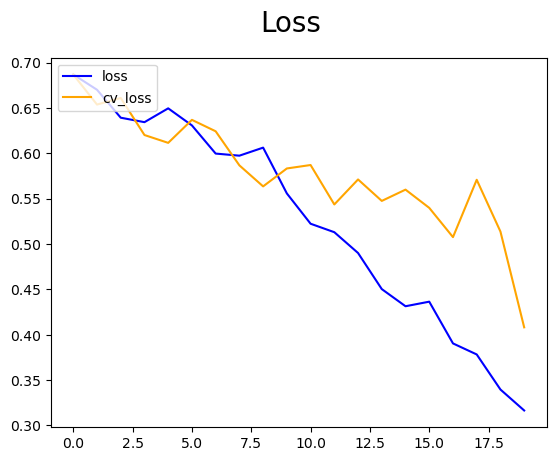

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

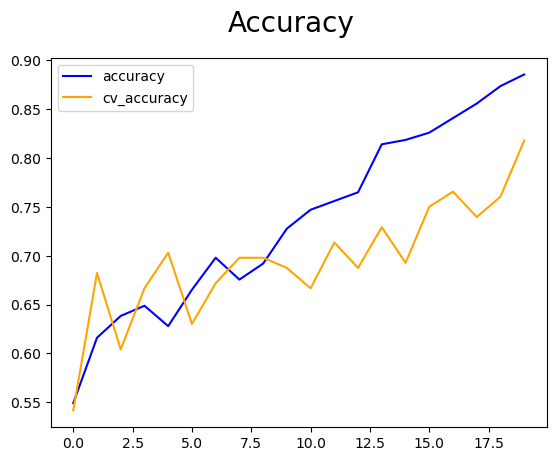

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [59]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [61]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [62]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.7599999904632568, Recall: 0.7755101919174194, Accuracy: 0.7809523940086365


In [63]:
from tensorflow.keras.models import load_model

In [64]:
import tensorflow as tf

# Save the model in SavedModel format
tf.saved_model.save(model, "saved_model/my_model")

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [65]:
Y_pred = model.predict(test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step


In [66]:
Y_pred

array([[3.10765915e-02],
       [1.46337203e-04],
       [2.54907399e-01],
       [1.92064606e-02],
       [8.76393139e-01],
       [4.34458740e-02],
       [8.71427357e-01],
       [9.27695751e-01],
       [2.92109132e-01],
       [2.99241871e-01],
       [2.91742742e-01],
       [4.95986998e-01],
       [5.35960674e-01],
       [6.64824061e-03],
       [7.14554191e-01],
       [8.65802467e-02],
       [8.77887070e-01],
       [5.75500727e-01],
       [9.23177123e-01],
       [3.66840750e-01],
       [6.42629504e-01],
       [2.24617437e-01],
       [1.09333538e-01],
       [6.53497398e-01],
       [4.94072020e-01],
       [8.05385232e-01],
       [9.57962215e-01],
       [8.77771199e-01],
       [9.78752494e-01],
       [7.02662230e-01],
       [5.39467812e-01],
       [3.69633973e-01],
       [1.45412415e-01],
       [3.20472755e-03],
       [7.67745793e-01],
       [1.58348858e-01],
       [7.80935228e-01],
       [3.96264553e-01],
       [9.23336625e-01],
       [4.99082655e-01],


In [67]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    print("True Labels (y):", y)
    print("Predicted Labels (yhat):", yhat)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
True Labels (y): [1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1]
Predicted Labels (yhat): [[0.9469265 ]
 [0.15324402]
 [0.7406572 ]
 [0.9734581 ]
 [0.09993877]
 [0.40567154]
 [0.7821211 ]
 [0.61793387]
 [0.22461744]
 [0.13333075]
 [0.47916672]
 [0.6492785 ]
 [0.6834605 ]
 [0.59742403]
 [0.26364905]
 [0.23835082]
 [0.01920646]
 [0.8364019 ]
 [0.06697714]
 [0.6158234 ]
 [0.04413782]
 [0.71060276]
 [0.5269841 ]
 [0.29673132]
 [0.8556062 ]
 [0.96524376]
 [0.36684075]
 [0.5394678 ]
 [0.85173666]
 [0.8467671 ]
 [0.34042245]
 [0.29210916]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
True Labels (y): [0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0]
Predicted Labels (yhat): [[0.4261166 ]
 [0.0316793 ]
 [0.16471338]
 [0.03893448]
 [0.36218387]
 [0.14541242]
 [0.9298377 ]
 [0.36917016]
 [0.0280839 ]
 [0.8212279 ]
 [0.0122766 ]
 [0.06733347]
 [0.0627619 ]
 [0.38055873]
 [0.3812197 ]
 [0.21209191]
 [0.12680912]
 [0.568384  ]
 [0.158

In [68]:
# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and collect true and predicted labels
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    true_labels.extend(y)
    # Convert predicted probabilities to binary values (0 or 1)
    binary_predictions = [1 if p[0] > 0.5 else 0 for p in yhat]
    predicted_labels.extend(binary_predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Confusion Matrix:
[[40 17]
 [11 37]]


In [69]:
from sklearn.metrics import classification_report

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        57
           1       0.69      0.77      0.73        48

    accuracy                           0.73       105
   macro avg       0.73      0.74      0.73       105
weighted avg       0.74      0.73      0.73       105



In [70]:
# Define class labels (assuming binary classification)
class_labels = ["Real", "Fake"]

# Iterate through the test dataset and print labels according to their respective classes
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    
    # Convert predicted probabilities to binary values (0 or 1)
    binary_predictions = [1 if p[0] > 0.5 else 0 for p in yhat]
    
    # Print true and predicted labels along with their corresponding class labels
    for true_label, predicted_label in zip(y, binary_predictions):
        print("True Label:", class_labels[true_label])
        print("Predicted Label:", class_labels[predicted_label])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted Label: Real
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted Label: Real
True Label: Fake
Predicted Label: Fake
True Label: Fake
Predicted Label: Fake
True Label: Fake
Predicted Label: Fake
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted Label: Real
True Label: Real
Predicted Label: Real
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted Label: Fake
True Label: Fake
Predicted Label: Fake
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted Label: Fake
True Label: Real
Predicted Label: Real
True Label: Real
Predicted Label: Real
True Label: Fake
Predicted Label: Fake
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted Label: Real
True Label: Fake
Predicted Label: Real
True Label: Real
Predicted Label: Fake
True Label: Fake
Predicted Label: Real
True Label: Fake
Predicted Label: Fake
True Label: Real
Predicted

In [72]:
from sklearn.metrics import confusion_matrix

# Define class labels (assuming binary classification)
class_labels = ["fake", "real"]

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])

# Print confusion matrix with label names
print("Confusion Matrix:")
print("\t\tPredicted " + "\tPredicted ".join(class_labels))
for i, row in enumerate(conf_matrix):
    print(f"True {class_labels[i]}:\t{row[0]}\t\t{row[1]}")



Confusion Matrix:
		Predicted fake	Predicted real
True fake:	40		17
True real:	11		37


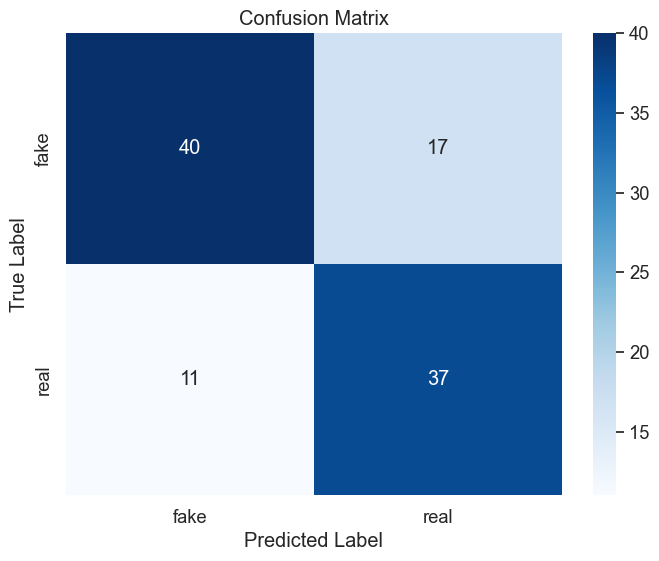

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample confusion matrix
conf_matrix = [[40, 17], [11, 37]]  # Replace with your actual confusion matrix

# Define class labels
class_labels = ["fake", "real"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
